Here’s a detailed and engaging summary of the transcript:

---

### **Key Challenges in Retrieval-Augmented Generation (RAG)**
- **Relevance of Retrieved Context**: Often, retrieval brings back large chunks of text where only small parts are relevant, or multiple chunks may be needed for a complete answer.
- **In-Context Learning Efficiency**: Unnecessary facts can clutter the language model’s context window, reducing clarity and efficiency.

---

### **Introduction to Contextual Compression and Filters**
**Purpose**: Enhance the retrieval pipeline by compressing and filtering documents to extract only the most relevant parts before passing them to the language model.

#### **Components of Contextual Compression**:
1. **Base Retriever**: Fetches initial chunks of information.
2. **Compressors and Filters**: Processes the retrieved documents to retain only relevant content.

---

### **Techniques for Compression and Filtering**

1. **LLM Chain Extractor**:
   - **Purpose**: Trims irrelevant parts while preserving useful content as is.
   - **How It Works**:
     - Prompt instructs the model to extract relevant context without editing.
     - Result: Shorter, cleaner, and more precise outputs.

2. **LLM Chain Filter**:
   - **Purpose**: Acts as a binary “Yes/No” filter to assess the relevance of retrieved chunks.
   - **How It Works**:
     - Model determines if the context is relevant to the query.
     - Example: Trims irrelevant details like URLs or non-critical content.

3. **Embedding Filter**:
   - **Purpose**: Refines retrieved contexts further using embedding-based similarity checks.
   - **How It Works**:
     - Retrieves initial contexts using embeddings.
     - Applies another round of embedding similarity to rank or filter refined chunks.
   - **Use Case**: Useful for multi-step pipelines where different embedding models or thresholds are applied.

---

### **Pipeline Compression Techniques**

1. **Splitting and Overlapping**:
   - Splits large chunks into smaller, manageable parts with overlaps to preserve context continuity.

2. **Layered Processing**:
   - Sequentially applies compressors and filters:
     - Example: Split → Compress with LLM → Embed for relevance.

3. **Ensemble Retrieval**:
   - Retrieves from multiple sources and consolidates information via filters and compressors.

4. **Customized Embedding and Filtering**:
   - Multiple embeddings (e.g., BGE, OpenAI) can be used for different stages of the pipeline.

---

### **Advantages of Contextual Compression**
- **Efficiency**: Reduces irrelevant information passed to the language model.
- **Precision**: Ensures higher relevance and contextual accuracy.
- **Flexibility**: Pipelines can be tailored for specific domains or use cases (e.g., medical, legal).

---

### **Best Practices for RAG Pipelines**
1. **Prompt Optimization**:
   - Tailor prompts for the specific domain or task instead of relying on generic ones.
   - Example: For medical queries, prompts should emphasize retrieving medically relevant details.

2. **Balancing Speed and Quality**:
   - For real-time tasks, minimize the number of steps in the pipeline.
   - For summarization or offline tasks, prioritize accuracy with multiple steps.

3. **Testing and Iteration**:
   - Experiment with different combinations of compressors, filters, and embeddings.
   - Measure time and accuracy for each pipeline configuration.

---

### **Practical Implementation Example**
- **Setup**:
  - Use LangChain with BGE embeddings and FAISS for document retrieval.
  - Split documents into chunks and create helper functions to manage retrievals.
- **Pipeline Design**:
  - Combine LLM chain extractors, filters, and embedding filters.
  - Adjust parameters (e.g., chunk size, overlap) to optimize results.
- **Customization**:
  - Rewrite prompts for specific use cases to maximize relevance and clarity.

---

### **Final Takeaway**
Contextual compression and filtering are essential tools for building effective and precise RAG pipelines. By leveraging compressors, filters, and well-optimized prompts, you can significantly improve the relevance of retrieved information, leading to better performance in tasks like summarization and real-time querying.

---

Let me know if you'd like more elaboration or examples from the transcript! 😊

समझ गया, अब इसको हिंदी में लिखते हैं ताकि पढ़ने और समझने में मज़ा भी आए और पूरी बात साफ-सुथरी तरीके से समझ आ जाए। 😊

---

### **RAG (Retrieval-Augmented Generation) में सबसे बड़ा चैलेंज क्या है?**
1. **कॉन्टेक्स्ट की उपयोगिता**:  
   अक्सर ऐसा होता है कि रिट्रीवर ढेर सारा डेटा वापस लाता है, जिसमें से सिर्फ कुछ हिस्से ही असली जवाब देने में काम आते हैं।  
   - कभी-कभी पूरा सवाल जवाब देने के लिए कई अलग-अलग हिस्सों (chunks) से जानकारी जोड़ने की ज़रूरत पड़ती है।  
   - अगर संदर्भ में बेकार जानकारी आ जाए, तो यह मॉडल की "In-Context Learning" विंडो को भर देता है, जिससे सटीकता कम हो सकती है।

2. **स्पष्टता का अभाव**:  
   सवाल से जुड़े तथ्य के अलावा दूसरी चीज़ें जवाब में शामिल हो जाती हैं, जो मॉडल की परफॉर्मेंस खराब कर सकती हैं।  

---

### **समाधान: कॉन्टेक्स्चुअल कंप्रेशन और फिल्टर**
**क्यों ज़रूरी है?**  
कंप्रेशन और फिल्टरिंग से सिर्फ वही डेटा चुना जाता है जो असल में सवाल के जवाब देने में मददगार हो।  

#### **प्रक्रिया के चरण**:  
1. **बेस रिट्रीवर**:  
   पहले, रिट्रीवर सवाल से मिलते-जुलते दस्तावेज़ या डेटा लाता है।  
2. **डॉक्यूमेंट कंप्रेशन और फिल्टरिंग**:  
   इस स्टेप में डेटा प्रोसेस किया जाता है ताकि केवल उपयोगी जानकारी बची रहे।  

---

### **कंप्रेशन और फिल्टरिंग के तरीके**  

#### 1. **LLM चेन एक्सट्रैक्टर**:
   - **काम**:  
     यह मॉडल से पूछता है कि दिए गए संदर्भ में से कौन-सा हिस्सा सवाल से जुड़ा है, और बाकी गैरज़रूरी डेटा हटा देता है।  
   - **कैसे काम करता है?**  
     - मॉडल को एक प्रॉम्प्ट दिया जाता है:  
       *"सवाल और संदर्भ को ध्यान में रखते हुए, प्रासंगिक हिस्सों को ज्यों का त्यों निकालें। अगर कुछ भी प्रासंगिक नहीं है, तो कोई आउटपुट न दें।"*  
     - नतीजा: छोटा, साफ और सटीक आउटपुट मिलता है।  

#### 2. **LLM चेन फिल्टर**:
   - **काम**:  
     यह "हां" या "ना" की तरह फैसला करता है कि संदर्भ प्रासंगिक है या नहीं।  
   - **कैसे काम करता है?**  
     - प्रॉम्प्ट में मॉडल से कहा जाता है:  
       *"अगर संदर्भ सवाल से जुड़ा हो, तो 'हां' लौटाएं, वरना 'ना'।"*  
     - उदाहरण: बेकार जानकारी जैसे URL, ग्रीटिंग्स आदि हटा दी जाती हैं।  

#### 3. **एंबेडिंग फिल्टर**:
   - **काम**:  
     रिट्रीव किए गए डेटा पर एंबेडिंग-आधारित चेक लगाकर यह तय करता है कि कौन-से हिस्से ज्यादा प्रासंगिक हैं।  
   - **कैसे काम करता है?**  
     - पहले, एंबेडिंग्स का उपयोग करके संदर्भ लाया जाता है।  
     - फिर एक और एंबेडिंग चेक किया जाता है ताकि रैंकिंग और फाइनल फिल्टरिंग हो सके।  
   - **उपयोगिता**:  
     मल्टी-स्टेप पाइपलाइन के लिए बहुत फायदेमंद, खासकर जब अलग-अलग एंबेडिंग मॉडल्स का उपयोग हो।  

---

### **पाइपलाइन कंप्रेशन तकनीकें**

#### 1. **स्प्लिटिंग और ओवरलैप**:
   - बड़े हिस्सों को छोटे-छोटे टुकड़ों में तोड़ना ताकि हर हिस्से को अलग से देखा जा सके।  
   - ओवरलैपिंग जोड़ने से संदर्भ बना रहता है।  

#### 2. **लेयर्ड प्रोसेसिंग**:
   - एक के बाद एक स्टेप्स को लागू करना:  
     - *स्प्लिट → LLM कंप्रेशन → एंबेडिंग चेक।*  

#### 3. **एंसेंबल रिट्रीवल**:
   - अलग-अलग स्रोतों से डेटा लाकर उसे एक साथ प्रोसेस करना।  

---

### **RAG में कंप्रेशन का महत्व**  

1. **तेज़ और सटीक जवाब**:  
   बेकार जानकारी को हटा देने से मॉडल को केवल प्रासंगिक चीजें मिलती हैं, जिससे जवाब बेहतर और तेज़ हो जाता है।  

2. **डोमेन-स्पेसिफिक कस्टमाइज़ेशन**:  
   अगर आपका काम किसी खास क्षेत्र (जैसे मेडिकल, लीगल) से जुड़ा है, तो आपको उस डोमेन के लिए प्रॉम्प्ट और पाइपलाइन को कस्टमाइज़ करना चाहिए।  

---

### **बेहतरीन RAG पाइपलाइन बनाने के टिप्स**  

1. **प्रॉम्प्ट को ऑप्टिमाइज़ करें**:  
   - जनरल प्रॉम्प्ट की जगह डोमेन-फोकस्ड प्रॉम्प्ट का इस्तेमाल करें।  
   - उदाहरण: मेडिकल डेटा के लिए सिर्फ क्लिनिकल जानकारी पर फोकस करें।  

2. **गति और गुणवत्ता में संतुलन**:  
   - *रियल-टाइम* क्वेरी के लिए कम स्टेप्स वाली पाइपलाइन बनाएं।  
   - *ऑफलाइन* टास्क (जैसे समरी बनाना) के लिए ज्यादा स्टेप्स आज़माएं।  

3. **टेस्ट और इटरेट करें**:  
   - अलग-अलग कॉम्बिनेशन ट्राई करें और परफॉर्मेंस को मापें।  
   - हर स्टेप की स्पीड और सटीकता की जांच करें।  

---

### **प्रैक्टिकल इंप्लीमेंटेशन**  

#### **सेटअप**:  
- LangChain, BGE एंबेडिंग्स, और FAISS का उपयोग करें।  
- दस्तावेज़ों को टुकड़ों में बांटें और रिट्रीवल के लिए हेल्पर फंक्शन बनाएं।  

#### **पाइपलाइन डिज़ाइन**:  
- **कंप्रेशन और फिल्टर**: LLM चेन, एंबेडिंग फिल्टर लगाएं।  
- **कस्टमाइज़ेशन**: हर चरण को अपनी ज़रूरत के हिसाब से ट्वीक करें।  

---

### **अंतिम संदेश**  
कंप्रेशन और फिल्टरिंग RAG को बेहतर बनाने के लिए ज़रूरी हैं। सही प्रॉम्प्ट, कस्टमाइजेशन, और प्रोसेसिंग से आप ज़्यादा सटीक और उपयोगी जवाब पा सकते हैं।  

अब कोशिश करें और अपने डेटा सेट के साथ इसे आज़माएं। कोई सवाल हो, तो पूछें! 😊  

---

अब तो पढ़ने में मज़ा आया? 😄

Arre, samajh gaya ab! Full-on Hinglish mode me likhte hain! 😄 Ab khud padho aur batao mazza aaya ya nahi:

---

### **RAG (Retrieval-Augmented Generation) ka sabse bada challenge kya hai?**  

1. **Context ki relevance**:  
   Retrieval ke baad jo data aata hai, usme se sirf kuch parts kaam ke hote hain, baaki toh bas "extra baggage" hota hai.  
   - Agar irrelevant data zyada ho, toh LLM ki context window khali waste ho jati hai. Phir ya toh model galat jawab dega ya incomplete.  

2. **Clarity ka lack**:  
   Sawal ka answer dene ke bajay extra info aa jati hai, jo response ko confusing banati hai.  

---

### **Solution: Contextual Compression aur Filtering**  

Compression aur filtering ka kaam hai ki bas wahi cheezein chuni jayein jo question ke answer me kaam aayein. Baaki sab hata do! 🚀  

#### **Steps of Process**:  
1. **Base Retriever**:  
   Question se related documents ya chunks laye jaate hain.  

2. **Document Compression aur Filtering**:  
   Aaya hua data refine kiya jata hai taaki bas kaam ki info bache.  

---

### **Compression aur Filtering ke Methods**  

#### 1. **LLM Chain Extractor**:  
   - **Kya karta hai?**  
     Ye LLM se puchta hai ki diye gaye context me se sirf kaam ki cheez nikaale, baaki drop kar de.  
   - **Kaise kaam karta hai?**  
     - Model ko ek prompt dete hain, jaise:  
       *"Sawal aur context ke hisaab se relevant parts extract karo. Agar kuch relevant nahi, toh kuch mat do."*  
     - Result: Ek short aur precise output.  

#### 2. **LLM Chain Filter**:  
   - **Kya karta hai?**  
     Ye bas decide karta hai ki context relevant hai ya nahi. Simple "Yes" ya "No".  
   - **Kaise kaam karta hai?**  
     - Prompt example:  
       *"Agar context question ke relevant hai, toh 'Haan' likho, warna 'Nahi'."*  
     - Useless cheezein, like URLs ya random greetings, nikal jati hain.  

#### 3. **Embedding Filter**:  
   - **Kya karta hai?**  
     Embeddings ki help se context aur question ka match check karta hai.  
   - **Kaise kaam karta hai?**  
     - First pass me similar context retrieve karte hain.  
     - Phir second pass me deep filtering karte hain for higher accuracy.  
   - **Usefulness**:  
     Jab multiple retrieval sources ho, tab best hai!  

---

### **Pipeline Compression Techniques**  

#### 1. **Splitting aur Overlap**:  
   - Bade documents ko chhote parts (chunks) me divide karna.  
   - Overlap ensure karta hai ki context continuity rahe.  

#### 2. **Layered Processing**:  
   - Ek ke baad ek steps apply karo:  
     - *Split → LLM Compression → Embedding Check.*  

#### 3. **Ensemble Retrieval**:  
   - Alag-alag sources se data collect karke ek saath process karo.  

---

### **RAG me Compression ka Importance**  

1. **Faster aur Accurate Answers**:  
   Extra info ko cut karne se model directly relevant context pe focus karta hai.  

2. **Domain-Specific Customization**:  
   Agar tumhara kaam specific domain (jaise medical ya legal) me hai, toh pipeline ko uske hisaab se tweak karna padega.  

---

### **Best RAG Pipeline Banane ke Tips**  

1. **Prompt Optimization**:  
   - General prompts ki jagah domain-specific prompts use karo.  
   - Example: *Medical data ke liye clinical keywords add karo.*  

2. **Speed aur Quality ka Balance**:  
   - Real-time tasks ke liye short pipelines design karo.  
   - Offline tasks ke liye detailed pipelines try karo.  

3. **Testing aur Iteration**:  
   - Alag combinations test karo aur performance measure karo.  
   - Har step ki speed aur accuracy ko track karo.  

---

### **Practical Implementation**  

#### **Setup**:  
- LangChain, BGE embeddings aur FAISS ka use karo.  
- Documents ko chunks me split karo aur helper functions banao.  

#### **Pipeline Design**:  
- **Compression aur Filter**: LLM Chain aur Embedding Filters lagao.  
- **Customization**: Har step ko apne use case ke hisaab se tweak karo.  

---

### **End Note**  
Compression aur filtering RAG pipelines ka ek "must-have" part hai. Agar tumne ye optimize kar liya, toh tumhari retrieval speed, accuracy, aur relevance sab boost ho jayegi. Phir chaahe tum research paper ka summary banao ya chatbot banao—sab smooth chalega!  

Koi doubt ho, toh seedha pucho! 😄  

---

Ab toh pure "fun-learning" vibes hone chahiye, hai na? 😉

![Sam Witteveen - Advanced RAG 04 - Contextual Compressors & Filters [4sRigbRITF0 - 793x446 - 1m10s].png](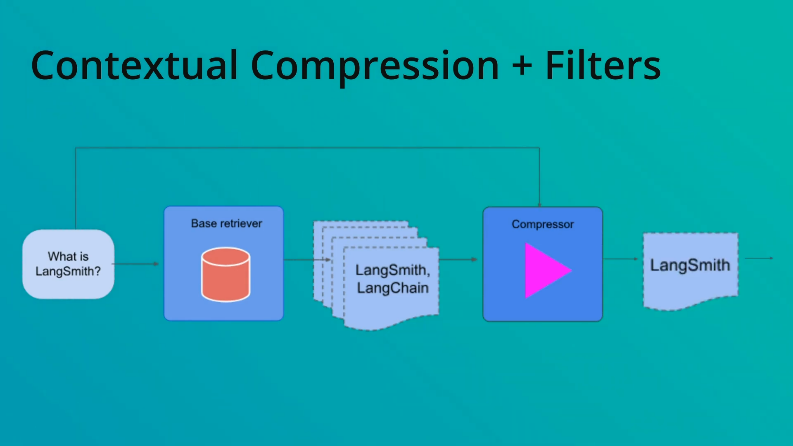)

![Sam Witteveen - Advanced RAG 04 - Contextual Compressors & Filters [4sRigbRITF0 - 793x446 - 2m02s].png](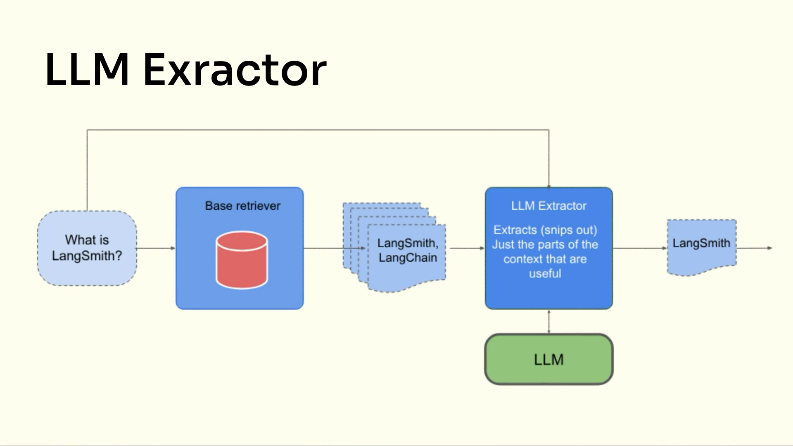)

This LLM need not to be same as main LLM.You can fine tunethis LLM to only extract the relevamt informations.

![Sam Witteveen - Advanced RAG 04 - Contextual Compressors & Filters [4sRigbRITF0 - 793x446 - 3m04s].png](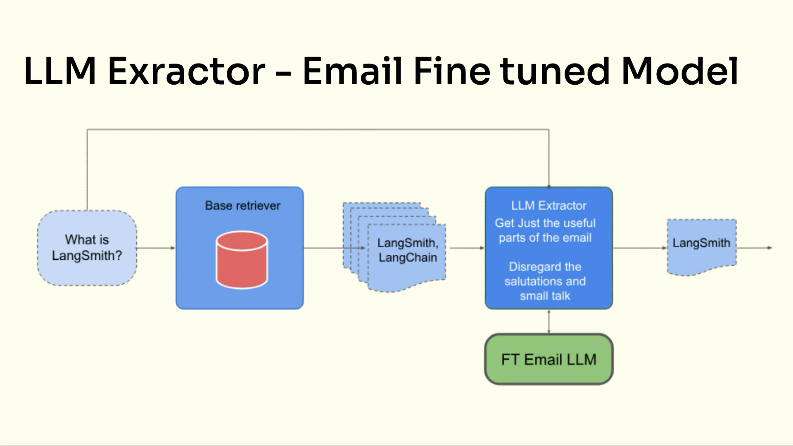)

![Sam Witteveen - Advanced RAG 04 - Contextual Compressors & Filters [4sRigbRITF0 - 793x446 - 3m20s].png](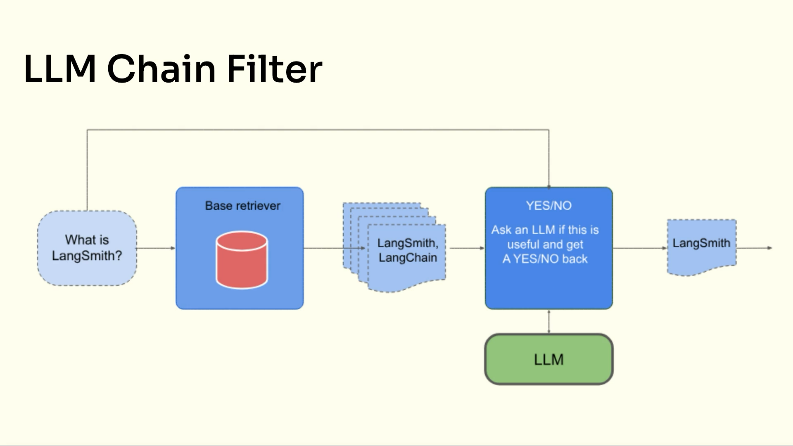)

![Sam Witteveen - Advanced RAG 04 - Contextual Compressors & Filters [4sRigbRITF0 - 793x446 - 3m45s].png](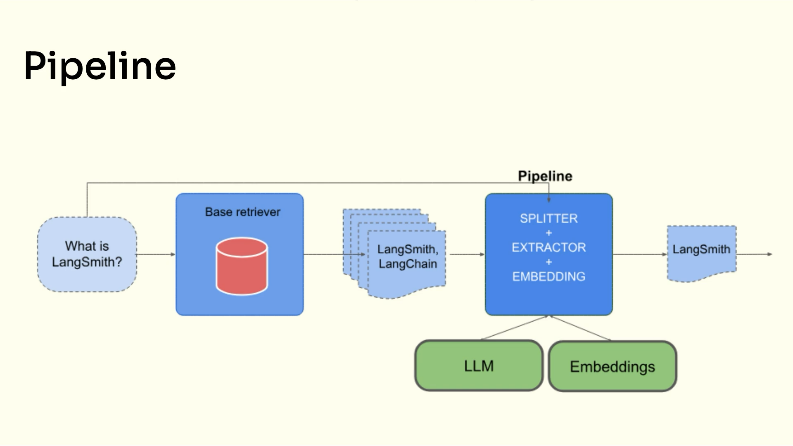)

Of course! The diagram illustrates a **pipeline process** for improving the retrieval and processing of information in a Retrieval-Augmented Generation (RAG) system. Let me break it down step-by-step:

---

### 1. **Input Question**
   - Example: **"What is LangSmith?"**
   - This is the query provided by the user, which the system will use to retrieve relevant information.

---

### 2. **Base Retriever**
   - **Purpose:** The base retriever is responsible for fetching potentially relevant documents or chunks of information from a data source (like a database or a document store).  
   - **How it works:**  
     - It uses embeddings to match the query with stored documents.  
     - However, this initial retrieval might bring back **irrelevant information** or overly **verbose chunks**.  
     - Example output: It might fetch multiple chunks containing "LangSmith" but with unnecessary surrounding context.

---

### 3. **Pipeline (Post-Retrieval Processing)**  
   This is where **contextual compression and filtering** happen to clean up the retrieved documents.  

   - **Components of the Pipeline:**
     1. **Splitter:**  
        - Splits the retrieved large chunks into smaller pieces for easier processing.  
        - Example: A chunk of 1000 characters could be split into smaller, overlapping chunks of 300 characters.  

     2. **Extractor:**  
        - Extracts only the parts of the text relevant to the question.  
        - Uses an **LLM (Large Language Model)** to analyze and retain meaningful content while discarding the rest.  
        - Example: From a paragraph, it might extract only the sentence describing LangSmith as "a unified platform for debugging and testing."

     3. **Embedding Filter:**  
        - Once the chunks are processed, embeddings are re-evaluated to rank and retain only the most relevant chunks.  
        - **Why another embedding step?** After splitting and extracting, the context may have changed, and a fresh embedding ensures that only high-quality, query-relevant data is retained.

---

### 4. **Output (Clean Context to Final LLM)**  
   - The cleaned-up and filtered context is passed to the final **LLM** (e.g., GPT-4 or any fine-tuned model) to generate the answer.  
   - This step ensures that the model operates on **concise and high-quality data**, leading to better and faster responses.

---

### Supporting Components
- **Embeddings:**  
   - Used in both the retriever and the embedding filter to calculate similarity between the query and documents.  
   - Different embedding models (e.g., OpenAI embeddings or BGE embeddings) might be used at various stages.  

- **LLM:**  
   - Plays multiple roles in this pipeline, including extraction, filtering, and final answer generation.

---

### Example Flow:
1. User asks, **"What is LangSmith?"**
2. Base retriever fetches multiple documents that mention LangSmith.  
   Example:  
   - Chunk 1: "LangSmith is a platform... [irrelevant details]."  
   - Chunk 2: "LangChain and LangSmith together... [irrelevant details]."  

3. The pipeline processes these chunks:  
   - Splits long chunks into smaller ones.  
   - Uses an extractor to keep only relevant sentences (e.g., "LangSmith is a unified platform for debugging and testing.").  
   - Filters irrelevant chunks using embeddings.

4. The final cleaned-up context is passed to the LLM to generate a precise and relevant answer:  
   **"LangSmith is a unified platform for debugging, testing, and evaluating applications."**

---

This pipeline ensures **better quality**, **higher accuracy**, and **optimized resource usage** when answering queries! Let me know if you'd like me to elaborate further! 😊

In [1]:
!pip -q install langchain huggingface_hub openai chromadb tiktoken faiss-cpu
!pip -q install sentence_transformers
!pip -q install -U FlagEmbedding

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.0 MB/s eta 0:00:00

In [3]:
!mkdir -p blog_posts
!unzip -q /content/langchain_blog_posts.zip -d blog_posts

In [5]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.25
    Uninstalling langchain-core-0.3.25:
      Successfully uninstalled langchain-core-0.3.25
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.12
    Uninstalling langchain-0.3.12:
      Successfully uninstalled langchain-0.3.12


## BGE Embeddings

In [6]:
from langchain.embeddings import HuggingFaceBgeEmbeddings

model_name = "BAAI/bge-small-en-v1.5"
encode_kwargs = {'normalize_embeddings': True} # set True to compute cosine similarity

bge_embeddings = HuggingFaceBgeEmbeddings(
    model_name = model_name,
    model_kwargs = {'device': 'cuda'},
    encode_kwargs = encode_kwargs
)

<ipython-input-6-561de817a212>:6: LangChainDeprecationWarning: The class `HuggingFaceBgeEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  bge_embeddings = HuggingFaceBgeEmbeddings(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## Data prep


In [8]:
from langchain_community.document_loaders import TextLoader

loaders = [
    TextLoader('/content/blog_posts/blog.langchain.dev_announcing-langsmith_.txt'),
    TextLoader('/content/blog_posts/blog.langchain.dev_benchmarking-question-answering-over-csv-data_.txt'),
]
docs = []
for l in loaders:
    docs.extend(l.load())

In [9]:
len(docs)

2

In [11]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
texts = text_splitter.split_documents(docs)

In [12]:
# Helper function for printing docs

def pretty_print_docs(docs):
    print(f"\n{'-' * 100}\n".join([f"Document {i+1}:\n\n" + d.page_content for i, d in enumerate(docs)]))

In [13]:
from langchain_community.vectorstores import FAISS

retriever = FAISS.from_documents(texts,
                                 bge_embeddings
                                #  OpenAIEmbeddings()
                                 ).as_retriever()

docs = retriever.get_relevant_documents("What is LangSmith?")
#lets look at the docs
pretty_print_docs(docs)

Document 1:

“Because we are building financial products, the bar for accuracy, personalization, and security is particularly high. LangSmith helps us build products we are confident putting in front of users.”

We can’t wait to bring these benefits to more teams. And we’ve got a long list of features on the roadmap like analytics, playgrounds, collaboration, in-context learning, prompt creation, and more.
----------------------------------------------------------------------------------------------------
Document 2:

URL: https://blog.langchain.dev/announcing-langsmith/
Title: Announcing LangSmith, a unified platform for debugging, testing, evaluating, and monitoring your LLM applications

LangChain exists to make it as easy as possible to develop LLM-powered applications.

We started with an open-source Python package when the main blocker for building LLM-powered applications was getting a simple prototype working. We remember seeing Nat Friedman tweet in late 2022 that there was “n

<ipython-input-13-07fdbec92eaf>:8: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents("What is LangSmith?")


There are many relevant and some non-relevant ducemtns here.

## Adding contextual compression with an LLMChainExtractor

Now let's wrap our base retriever with a ContextualCompressionRetriever. We'll add an LLMChainExtractor, which will iterate over the initially returned documents and extract from each only the content that is relevant to the query.

In [14]:
# from langchain.llms import OpenAI

import getpass
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

%pip install -qU langchain-google-genai

from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model = "gemini-1.5-pro",
    temperature = 0
    )

from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor


compressor = LLMChainExtractor.from_llm(llm)

# it needs a base retriever (we're using FAISS Retriever) and a compressor (Made above)
compression_retriever = ContextualCompressionRetriever(base_compressor = compressor,
                                                       base_retriever = retriever)

Enter your Google AI API key: ··········
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.3 MB/s eta 0:00:00


In [ ]:
help(LLMChainExtractor)

In [19]:
# compressor prompt
print(dir(compressor.llm_chain))

['InputType', 'OutputType', '__abstractmethods__', '__annotations__', '__class__', '__class_getitem__', '__class_vars__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__fields__', '__fields_set__', '__format__', '__ge__', '__get_pydantic_core_schema__', '__get_pydantic_json_schema__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__or__', '__orig_bases__', '__parameters__', '__pretty__', '__private_attributes__', '__pydantic_complete__', '__pydantic_computed_fields__', '__pydantic_core_schema__', '__pydantic_custom_init__', '__pydantic_decorators__', '__pydantic_extra__', '__pydantic_fields__', '__pydantic_fields_set__', '__pydantic_generic_metadata__', '__pydantic_init_subclass__', '__pydantic_parent_namespace__', '__pydantic_post_init__', '__pydantic_private__', '__pydantic_root_model__', '__pydantic_serializer__', 

In [20]:
compressor.llm_chain.get_prompts()

[PromptTemplate(input_variables=['context', 'question'], input_types={}, output_parser=NoOutputParser(), partial_variables={}, template='Given the following question and context, extract any part of the context *AS IS* that is relevant to answer the question. If none of the context is relevant return NO_OUTPUT. \n\nRemember, *DO NOT* edit the extracted parts of the context.\n\n> Question: {question}\n> Context:\n>>>\n{context}\n>>>\nExtracted relevant parts:')]

In [22]:
compressed_docs = compression_retriever.get_relevant_documents("What is LangSmith?")
pretty_print_docs(compressed_docs)

Document 1:

LangSmith, a unified platform for debugging, testing, evaluating, and monitoring your LLM applications
----------------------------------------------------------------------------------------------------
Document 2:

LangSmith gives you full visibility into model inputs and output of every step in the chain of events. This makes it easy for teams to experiment with new chains and prompt templates, and spot the source of unexpected results, errors, or latency issues. We’ll also expose latency and token usage so that you can identify which calls are causing issues.
----------------------------------------------------------------------------------------------------
Document 3:

Today, we’re introducing LangSmith, a platform to help developers close the gap between prototype and production. It’s designed for building and iterating on products that can harness the power–and wrangle the complexity–of LLMs.

LangSmith is now in closed beta. So if you’re looking for a robust, unif

So this done another call to LLM. Now the docs are compressed and we reduced the number from 4 to 3 this time. URL and title got trimmed out

## More built-in compressors: filters

### LLMChainFilter

Uses an LLM chain to select out the queries to show the final LLM - This could be shown to a model fine tuned to do this

"YES" we show it or "NO" we don't show it

In [23]:
from langchain.retrievers.document_compressors import LLMChainFilter

_filter = LLMChainFilter.from_llm(llm)


In [26]:
_filter.llm_chain.get_prompts()

[PromptTemplate(input_variables=['context', 'question'], input_types={}, output_parser=BooleanOutputParser(), partial_variables={}, template="Given the following question and context, return YES if the context is relevant to the question and NO if it isn't.\n\n> Question: {question}\n> Context:\n>>>\n{context}\n>>>\n> Relevant (YES / NO):")]

In [27]:
compression_retriever = ContextualCompressionRetriever(base_compressor = _filter, base_retriever = retriever)

compressed_docs = compression_retriever.get_relevant_documents("What is LangSmith")
pretty_print_docs(compressed_docs)

Document 1:

“Because we are building financial products, the bar for accuracy, personalization, and security is particularly high. LangSmith helps us build products we are confident putting in front of users.”

We can’t wait to bring these benefits to more teams. And we’ve got a long list of features on the roadmap like analytics, playgrounds, collaboration, in-context learning, prompt creation, and more.
----------------------------------------------------------------------------------------------------
Document 2:

Debugging

LangSmith gives you full visibility into model inputs and output of every step in the chain of events. This makes it easy for teams to experiment with new chains and prompt templates, and spot the source of unexpected results, errors, or latency issues. We’ll also expose latency and token usage so that you can identify which calls are causing issues.

We’ve also made it easy to change and rerun examples from the UI. We added this feature after seeing teams take

### EmbeddingsFilter : another way
Use an Embedding model to filter out the results that are closest to the query

In [28]:
# from langchain.embeddings import OpenAIEmbeddings
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.retrievers.document_compressors import EmbeddingsFilter

# embeddings = OpenAIEmbeddings()
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
embeddings_filter = EmbeddingsFilter(embeddings=embeddings, similarity_threshold=0.76)
compression_retriever = ContextualCompressionRetriever(base_compressor = embeddings_filter, base_retriever = retriever)

compressed_docs = compression_retriever.get_relevant_documents("What is LangSmith")
pretty_print_docs(compressed_docs)

Document 1:

URL: https://blog.langchain.dev/announcing-langsmith/
Title: Announcing LangSmith, a unified platform for debugging, testing, evaluating, and monitoring your LLM applications

LangChain exists to make it as easy as possible to develop LLM-powered applications.

We started with an open-source Python package when the main blocker for building LLM-powered applications was getting a simple prototype working. We remember seeing Nat Friedman tweet in late 2022 that there was “not enough tinkering happening.” The LangChain open-source packages are aimed at addressing this and we see lots of tinkering happening now (Nat agrees)–people are building everything from chatbots over internal company documents to an AI dungeon master for a Dungeons and Dragons game.
----------------------------------------------------------------------------------------------------
Document 2:

“Because we are building financial products, the bar for accuracy, personalization, and security is particularl

## Pipelines


### Stringing compressors and document transformers together

DocumentCompressorPipeline allows us to string things together.

BaseDocumentTransformers - can do transformations on the docs -eg. split the text and

EmbeddingsRedundantFilter - filter out what is not related after a split or transformation



In [29]:
from langchain.document_transformers import EmbeddingsRedundantFilter
from langchain.retrievers.document_compressors import DocumentCompressorPipeline
from langchain.text_splitter import CharacterTextSplitter

splitter = CharacterTextSplitter(chunk_size = 300, chunk_overlap=0, separator=". ")

redundant_filter = EmbeddingsRedundantFilter(embeddings = embeddings)
relevant_filter = EmbeddingsFilter(embeddings = embeddings, similarity_threshold = 0.76)

## making the pipeline
pipeline_compressor = DocumentCompressorPipeline(
    transformers = [splitter, redundant_filter, relevant_filter]
)

In [30]:
compression_retriever = ContextualCompressionRetriever(base_compressor = pipeline_compressor,
                                                       base_retriever = retriever)

compressed_docs = compression_retriever.get_relevant_documents("What is LangSmith")
pretty_print_docs(compressed_docs)

Document 1:

URL: https://blog.langchain.dev/announcing-langsmith/
Title: Announcing LangSmith, a unified platform for debugging, testing, evaluating, and monitoring your LLM applications

LangChain exists to make it as easy as possible to develop LLM-powered applications.

We started with an open-source Python package when the main blocker for building LLM-powered applications was getting a simple prototype working
----------------------------------------------------------------------------------------------------
Document 2:

“The use of LangSmith has been key to bringing production-ready LLM applications to our clients. LangSmith's ease of integration and intuitive UI enabled us to have an evaluation pipeline up and running very quickly
----------------------------------------------------------------------------------------------------
Document 3:

“Because we are building financial products, the bar for accuracy, personalization, and security is particularly high. LangSmith helps u

In [31]:
### different pipeline

## making the pipeline
pipeline_compressor = DocumentCompressorPipeline(
    transformers=[splitter, compressor, redundant_filter, relevant_filter]
)

In [35]:
compression_retriever = ContextualCompressionRetriever(base_compressor=pipeline_compressor,
                                                       base_retriever=retriever)

compressed_docs = compression_retriever.get_relevant_documents("What is LangSmith")
pretty_print_docs(compressed_docs)

ResourceExhausted: 429 Resource has been exhausted (e.g. check quota).

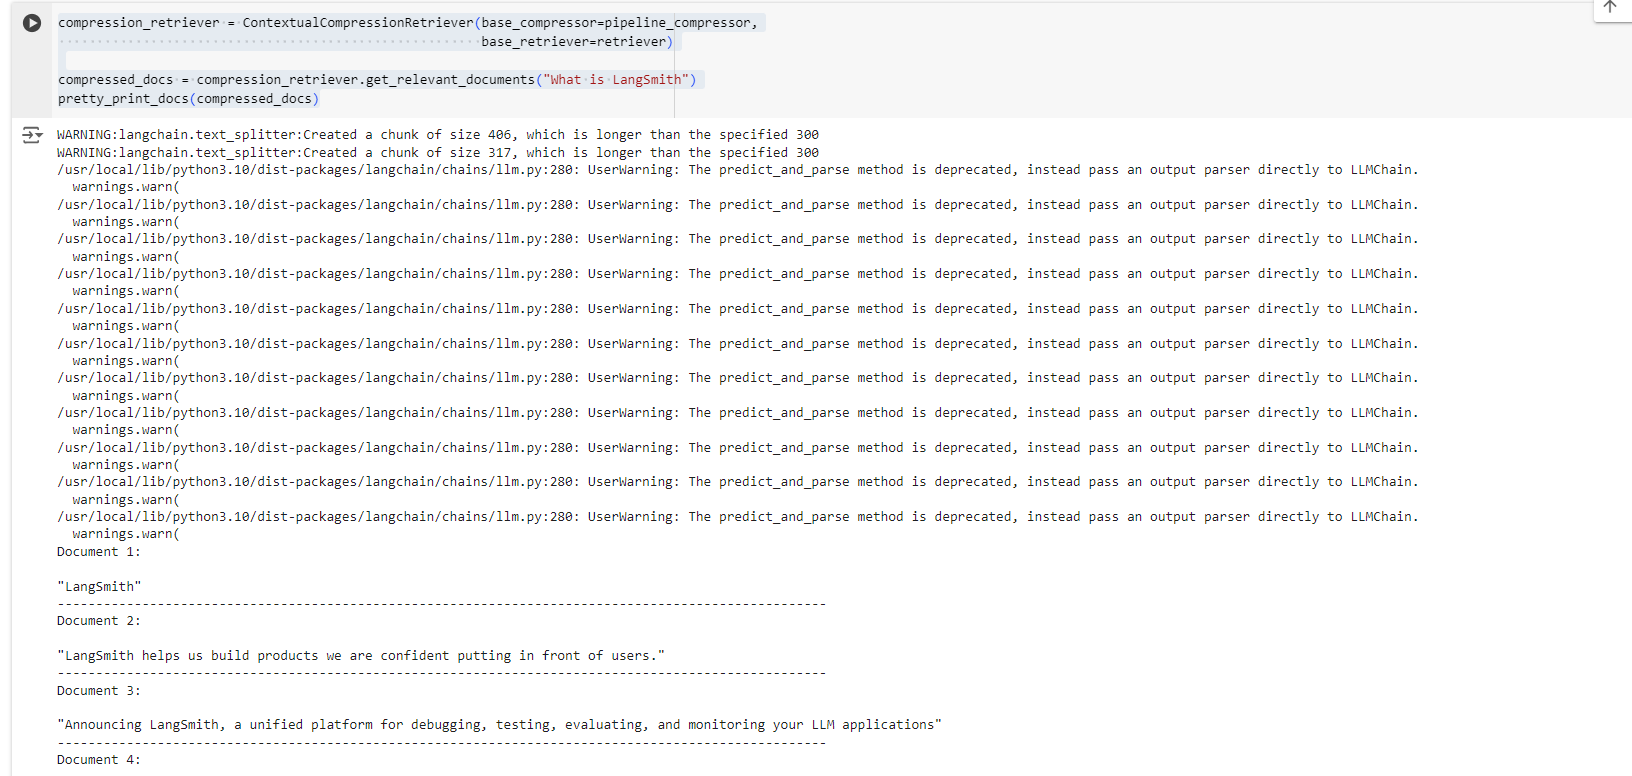

## Examples Pipelines

**Example 1** - filter, rewrite, check with embeddings

**Example 2** - retrieve multiple sources [ensemble], filter, rewrite,

**Example 3** - retrieve, split, check splits with embeddings, filter, rewrite,